# Train-Baselines

This notebook produces and saves the weights of a baseline network trained on MNIST and CIFAR10

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch import optim

from datasets import get_mnist_dataset, get_cifar10_dataset, get_data_loader
from utils import *

from models import *

## MNIST

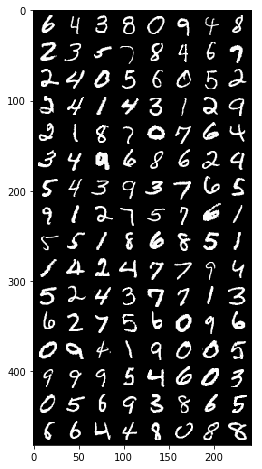

In [3]:
trainset, testset = get_mnist_dataset()
trainloader, testloader = get_data_loader(trainset, testset)
batch, labels = next(iter(trainloader))
plot_batch(batch)
batch_var = Variable(batch.cuda())
labels_var = Variable(one_hotify(labels).cuda())

In [4]:
base_model = BaselineCNN().cuda()
print(count_params(base_model))

base_loss = nn.CrossEntropyLoss()
base_optimizer = optim.Adam(base_model.parameters())
base_trainer = Trainer(base_model, base_optimizer, base_loss,
                       trainloader, testloader, use_cuda=True)

35445522


In [5]:
base_trainer.run(epochs=10)
base_trainer.save_checkpoint('weights/baseline_mnist.pth.tar')

[*] Training for 10 epochs
[*] Epoch 1, TrnLoss: 0.205, TrnAcc: 0.936, TstLoss: 0.043, TstAcc: 0.987
[*] Epoch 2, TrnLoss: 0.057, TrnAcc: 0.984, TstLoss: 0.037, TstAcc: 0.988
[*] Epoch 3, TrnLoss: 0.034, TrnAcc: 0.990, TstLoss: 0.033, TstAcc: 0.991
[*] Epoch 4, TrnLoss: 0.027, TrnAcc: 0.992, TstLoss: 0.030, TstAcc: 0.991
[*] Epoch 5, TrnLoss: 0.022, TrnAcc: 0.994, TstLoss: 0.038, TstAcc: 0.989
[*] Epoch 6, TrnLoss: 0.016, TrnAcc: 0.995, TstLoss: 0.036, TstAcc: 0.990
[*] Epoch 7, TrnLoss: 0.014, TrnAcc: 0.996, TstLoss: 0.034, TstAcc: 0.991
[*] Epoch 8, TrnLoss: 0.014, TrnAcc: 0.996, TstLoss: 0.033, TstAcc: 0.991
[*] Epoch 9, TrnLoss: 0.009, TrnAcc: 0.997, TstLoss: 0.044, TstAcc: 0.990
[*] Epoch 10, TrnLoss: 0.007, TrnAcc: 0.998, TstLoss: 0.040, TstAcc: 0.991


## CIFAR10

Files already downloaded and verified
Files already downloaded and verified


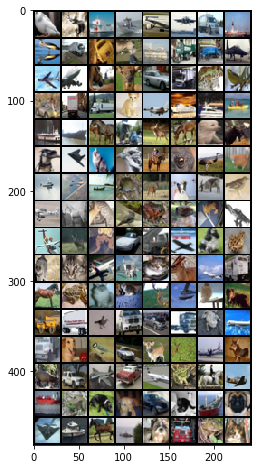

In [3]:
trainset, testset = get_cifar10_dataset()
trainloader, testloader = get_data_loader(trainset, testset)
batch, labels = next(iter(trainloader))
plot_batch(batch)
batch_var = Variable(batch.cuda())
labels_var = Variable(one_hotify(labels).cuda())

In [4]:
base_model = ResNet(n=9).cuda()
print(count_params(base_model))

base_loss = nn.CrossEntropyLoss()
base_optimizer = optim.SGD(base_model.parameters(), lr=0.1)
base_trainer = Trainer(base_model, base_optimizer, base_loss,
                       trainloader, testloader, use_cuda=True)

855050


In [5]:
# RandomCrop(28) reduces accuracy considerably with this architecture
base_trainer.run(epochs=10)
for param_group in base_trainer.optimizer.param_groups:
    param_group['lr'] = 0.1 * param_group['lr']
base_trainer.run(epochs=5)
for param_group in base_trainer.optimizer.param_groups:
    param_group['lr'] = 0.1 * param_group['lr']
base_trainer.run(epochs=5)
base_trainer.save_checkpoint('weights/resnet_cifar.pth.tar')

[*] Training for 10 epochs
[*] Epoch 1, TrnLoss: 1.620, TrnAcc: 0.398, TstLoss: 2.465, TstAcc: 0.328
[*] Epoch 2, TrnLoss: 1.149, TrnAcc: 0.584, TstLoss: 1.150, TstAcc: 0.589
[*] Epoch 3, TrnLoss: 0.925, TrnAcc: 0.672, TstLoss: 1.033, TstAcc: 0.646
[*] Epoch 4, TrnLoss: 0.784, TrnAcc: 0.722, TstLoss: 0.953, TstAcc: 0.673
[*] Epoch 5, TrnLoss: 0.690, TrnAcc: 0.758, TstLoss: 1.044, TstAcc: 0.643
[*] Epoch 6, TrnLoss: 0.621, TrnAcc: 0.784, TstLoss: 0.777, TstAcc: 0.728
[*] Epoch 7, TrnLoss: 0.568, TrnAcc: 0.800, TstLoss: 0.898, TstAcc: 0.691
[*] Epoch 8, TrnLoss: 0.520, TrnAcc: 0.821, TstLoss: 0.840, TstAcc: 0.733
[*] Epoch 9, TrnLoss: 0.483, TrnAcc: 0.831, TstLoss: 0.958, TstAcc: 0.706
[*] Epoch 10, TrnLoss: 0.454, TrnAcc: 0.842, TstLoss: 0.643, TstAcc: 0.786
[*] Training for 5 epochs
[*] Epoch 1, TrnLoss: 0.331, TrnAcc: 0.886, TstLoss: 0.440, TstAcc: 0.850
[*] Epoch 2, TrnLoss: 0.308, TrnAcc: 0.894, TstLoss: 0.436, TstAcc: 0.851
[*] Epoch 3, TrnLoss: 0.296, TrnAcc: 0.898, TstLoss: 0.438

In [ ]:
base_model = BaselineCNN(img_colors=3).cuda()
print(count_params(base_model))

base_loss = nn.CrossEntropyLoss()
base_optimizer = optim.Adam(base_model.parameters())
base_trainer = Trainer(base_model, base_optimizer, base_loss,
                       trainloader, testloader, use_cuda=True)

In [15]:
base_trainer.run(epochs=20)
base_trainer.save_checkpoint('weights/baseline_cifar.pth.tar')

[*] Training for 20 epochs
[*] Epoch 1, TrnLoss: 1.743, TrnAcc: 0.341, TstLoss: 1.480, TstAcc: 0.454
[*] Epoch 2, TrnLoss: 1.422, TrnAcc: 0.477, TstLoss: 1.359, TstAcc: 0.498
[*] Epoch 3, TrnLoss: 1.278, TrnAcc: 0.536, TstLoss: 1.199, TstAcc: 0.564
[*] Epoch 4, TrnLoss: 1.195, TrnAcc: 0.572, TstLoss: 1.136, TstAcc: 0.595
[*] Epoch 5, TrnLoss: 1.131, TrnAcc: 0.594, TstLoss: 1.110, TstAcc: 0.608
[*] Epoch 6, TrnLoss: 1.073, TrnAcc: 0.616, TstLoss: 1.061, TstAcc: 0.626
[*] Epoch 7, TrnLoss: 1.020, TrnAcc: 0.636, TstLoss: 1.083, TstAcc: 0.625
[*] Epoch 8, TrnLoss: 0.991, TrnAcc: 0.648, TstLoss: 1.022, TstAcc: 0.632
[*] Epoch 9, TrnLoss: 0.951, TrnAcc: 0.661, TstLoss: 0.933, TstAcc: 0.675
[*] Epoch 10, TrnLoss: 0.925, TrnAcc: 0.672, TstLoss: 0.899, TstAcc: 0.683
[*] Epoch 11, TrnLoss: 0.887, TrnAcc: 0.688, TstLoss: 0.970, TstAcc: 0.657
[*] Epoch 12, TrnLoss: 0.874, TrnAcc: 0.691, TstLoss: 0.924, TstAcc: 0.673
[*] Epoch 13, TrnLoss: 0.845, TrnAcc: 0.702, TstLoss: 0.907, TstAcc: 0.684
[*] Epo